In [1]:
# _____ ______  _____        _     _____ _   _ _____ 
#|  __ \| ___ \|  _  |      | |   |_   _| | | |  ___|
#| |  \/| |_/ /| | | |______| |     | | | | | | |__  
#| | __ | ___ \| | | |______| |     | | | | | |  __| 
#| |_\ \| |_/ /\ \_/ /      | |_____| |_\ \_/ / |___ 
# \____/\____/  \___/       \_____/\___/ \___/\____/ 
                                                    
## 20210823 - This is a script that will be used for LIVE data updates/plots at GBO during testing
## We will begin by importing the proper packages from the Drone Modules:
from dronehacks.GBO_Corr_Class import *
from dronehacks.Drone_Class import *

import pytz


In [2]:
## Let's specify the DISH COORDINATES from Pranav's Email:
    # 1. Want to initialize with additional receiver/array variables in dimensioned arrays:
            ##############################################################################################
            # I  Variable      # Dimension # description
            ##############################################################################################
            # A. Keys          # n dishes  # (string with name or channel index?)
            # B. Coordinates   # n by 3vec # (Vector position in local cartesian (E,N,U) relative origin)
            # C. Pointings     # n by 3vec # (Unit Vector in local cartesian (E,N,U))
            # D. Polarizations # n by 3vec # (Unit Vector in local cartesian (E,N,U))
            ##############################################################################################
    # 2. Want to calculate drone coordinates on per-dish basis, for xyz and rpt from origin based arrays

## Key, Position, Channel, Polarization, Pointing Variable Notes:

## 8 Dish 16Channel Array Configuration for the 6m Array at GBO:
# Dish 0:  [0, 1], (0.0, 0.0, 0.0)
# Dish 7:  [3, 2], (-24.215395745765452, -12.605737141316427, 0.0)
# Dish 2:  [4, 5], (-8.403824760877617, 16.143597163843634, 0.0)
# Dish 3:  [7, 6], (-8.071798581921817, -4.2019123804388085, 0.0)
# Dish 4:  [9, 8], (-12.273710962360624, 3.869886201483008, 0.0)
# Dish 5:  [10, 11], (-16.475623342799434, 11.941684783404824, 0.0))
# Dish 6:  [12, 13], (-20.345509544282443, -0.33202617895580033, 0.0) # CHIME FEED
# Dish 8:  [14, 15], (-28.41730812620426, -4.53393855939461, 0.0)

## 4Dish 8Channel Array Configuration for the 6m Array at GBO:
# Dish 0:  [0, 1], (0.0, 0.0, 0.0)
# Dish 7:  [3, 2], (-24.215395745765452, -12.605737141316427, 0.0)
# Dish 2:  [4, 5], (-8.403824760877617, 16.143597163843634, 0.0)
# Dish 3:  [7, 6], (-8.071798581921817, -4.2019123804388085, 0.0)

## Key, Position, Channel, Polarization, Pointing Variable Assignment:
## RECEIVER INFORMATION is needed to initialize the geometric environments: ##
## Must include some 'key' strings for labelling/identifying receivers: [Pranav's Conventions]
Array_Keys=["Dish_0","Dish_7","Dish_2","Dish_3","Dish_4","Dish_5","Dish_6","Dish_8"]
## Specify Coordinate Origin: #810m about MSL
GBO_HIRAX_DISH_0=pygeodesy.ellipsoidalNvector.LatLon(38.429280, -79.844990, 810).to3llh()
## Must Specify Coordinates and Pointings of receivers in Local Cartesian in an array of shape: n_receivers x 3 ##
Array_Coords=np.array([[0.0, 0.0, 0.0], # "Dish_0" \
                       [-24.215395745765452, -12.605737141316427, 0.0], # "Dish_7" \
                       [-8.403824760877617, 16.143597163843634, 0.0], # "Dish_2" \
                       [-8.071798581921817, -4.2019123804388085, 0.0], # "Dish_3" \
                       [-12.273710962360624, 3.869886201483008, 0.0], # "Dish_4" \
                       [-16.475623342799434, 11.941684783404824, 0.0], # "Dish_5" \
                       [-20.345509544282443, -0.33202617895580033, 0.0], # "Dish_6" \
                       [-28.41730812620426, -4.53393855939461, 0.0]]) # "Dish_8" \
## If pointings are defined by vectors in Local Coordinates (E,N,U) use:
Array_Pointings=np.array([[0,0,1], # +Z (up) in LC \
                          [0,0,1],\
                          [0,0,1],\
                          [0,0,1],\
                          [0,0,1],\
                          [0,0,1],\
                          [0,0,1],\
                          [0,0,1]])
## If pointings are defined by angles from zenith, use:
Array_Pointings=np.array([RotMat(np.array([0.0,0.0,0.0]))@np.array([0.0,0.0,1.0]),  # e.g. 1 deg of yaw and roll \
                          RotMat(np.array([0.0,0.0,0.0]))@np.array([0.0,0.0,1.0]),\
                          RotMat(np.array([0.0,0.0,0.0]))@np.array([0.0,0.0,1.0]),\
                          RotMat(np.array([0.0,0.0,0.0]))@np.array([0.0,0.0,1.0]),\
                          RotMat(np.array([0.0,0.0,0.0]))@np.array([0.0,0.0,1.0]),\
                          RotMat(np.array([0.0,0.0,0.0]))@np.array([0.0,0.0,1.0]),\
                          RotMat(np.array([0.0,0.0,0.0]))@np.array([0.0,0.0,1.0]),\
                          RotMat(np.array([0.0,0.0,0.0]))@np.array([0.0,0.0,1.0])])
## Define Array Polarizations (2 per dish) in Local Cartesian E,N,U:
Array_Pols=np.array([[[1,0,0],[0,1,0]], # E,N \
                     [[1,0,0],[0,1,0]], \
                     [[1,0,0],[0,1,0]], \
                     [[1,0,0],[0,1,0]], \
                     [[1,0,0],[0,1,0]], \
                     [[1,0,0],[0,1,0]], \
                     [[1,0,0],[0,1,0]], \
                     [[1,0,0],[0,1,0]]])

## 2 DISH PLOTTING:
GBO2_chmap=[0,1]
GBO2_automap=np.array([0,2])
## 4 DISH PLOTTING:
GBO4_chmap=np.array([0,1,3,2,4,5,7,6])
GBO4_automap=np.array([ 0,  8, 21, 15, 26, 30, 35, 33])
## 8 DISH PLOTTING:
GBO8_chmap=np.array([0,1,3,2,4,5,7,6,9,8,10,11,12,13,14,15])
GBO8_automap=np.array([0,  16,  45,  31,  58,  70,  91,  81, 108, 100, 115, 121, 126, 130, 133, 135])
#GBO8_automap=np.zeros(len(GBO8_chmap)).astype(int)
#prodmat=np.array([element for tupl in quicktest.prod for element in tupl]).reshape(len(quicktest.prod),2)
#for i,j in enumerate(GBO8_chmap):
#    GBO8_automap[i]=np.intersect1d(np.where(prodmat[:,0]==j),np.where(prodmat[:,1]==j))

## Information from Pranav's Emails/Sketches that has been used to create the above channelization:   
    
## Pranav's DISH COORDINATES were given in local cartesian, but are they in E,N,U?: YES
## Channel Map:
# Dish 0:  [0, 1],
# Dish 2:  [4, 5],
# Dish 3:  [6, 7],
# Dish 4:  [8, 9],
# Dish 5:  [10, 11],
# Dish 6:  [12, 13],
# Dish 7:  [2, 3],
# Dish 8:  [14, 15]

## Position Map:
# {'0': (0.0, 0.0, 0.0),
#  '1': (0.0, 0.0, 0.0),
# '2': (-24.215395745765452, -12.605737141316427, 0.0),
#  '3': (-24.215395745765452, -12.605737141316427, 0.0),
#  '4': (-8.403824760877617, 16.143597163843634, 0.0),
#  '5': (-8.403824760877617, 16.143597163843634, 0.0),
#  '6': (-8.071798581921817, -4.2019123804388085, 0.0),
#  '7': (-8.071798581921817, -4.2019123804388085, 0.0),
#  '8': (-12.273710962360624, 3.869886201483008, 0.0),
#  '9': (-12.273710962360624, 3.869886201483008, 0.0),
#  '10': (-16.475623342799434, 11.941684783404824, 0.0),
#  '11': (-16.475623342799434, 11.941684783404824, 0.0),
#  '12': (-20.345509544282443, -0.33202617895580033, 0.0),
#  '13': (-20.345509544282443, -0.33202617895580033, 0.0), # Hirax Feed
#   '14': (-28.41730812620426, -4.53393855939461, 0.0),
#  '15': (-28.41730812620426, -4.53393855939461, 0.0)}

## Polarization Map
#p1 = np.array([0, 3, 4, 7, 9, 10, 12, 14])
#p2 = np.array([1, 2, 5, 6, 8, 11, x, 15])

In [3]:
## Time array isn't valid because of interpolation bug, since drone data starts before telescope data...
## Fix interpolation axes of ds_CORR and ds_drone to solve this issue...?

class CONCAT:
    def __init__(self,CORRDATCLASS,DRONEDATCLASS):
        print('Initializing CONCAT CLASS using '+CORRDATCLASS.Data_Directory+' and '+DRONEDATCLASS.fn)
        ## Identify Filenames used in CONCAT Class:
        self.fn_corr=CORRDATCLASS.filenames
        self.fn_drone=DRONEDATCLASS.fn  
        ## Time dimensions of all arrays must be concat with receiver data. Time index is therefore defined wrt telescope data.
        self.t_index=CORRDATCLASS.t_index
        self.t_arr_datetime=CORRDATCLASS.t_arr_datetime
        self.f_arr=CORRDATCLASS.freq
        self.V=CORRDATCLASS.V_full
        ## Define lb and ub t_index corresponding to drone data start/stop times:
        drone_t_min=DRONEDATCLASS.t_arr_datetime[0]
        drone_t_max=DRONEDATCLASS.t_arr_datetime[-1]
        
        CORR_t_ind_lb=bisect.bisect_right(self.t_arr_datetime, pytz.UTC.localize(datetime.datetime.utcfromtimestamp(drone_t_min.astype('O')/1e9)))
        CORR_t_ind_ub=bisect.bisect_right(self.t_arr_datetime, pytz.UTC.localize(datetime.datetime.utcfromtimestamp(drone_t_max.astype('O')/1e9)))

#         CORR_t_ind_lb=bisect.bisect_right(self.t_arr_datetime, datetime.datetime.utcfromtimestamp(drone_t_min.astype('O')/1e9))
#         CORR_t_ind_ub=bisect.bisect_left(self.t_arr_datetime, datetime.datetime.utcfromtimestamp(drone_t_max.astype('O')/1e9))
        print('tmax = ', drone_t_max, 'tmin = ', drone_t_min)
        print('tmax indx correlator = ', CORR_t_ind_lb, 'tmin indx correlator = ', CORR_t_ind_ub)
        print(self.t_index[CORR_t_ind_lb:CORR_t_ind_ub].shape)
        ## Define interpolation time vectors for drone and corr data:
        tsepoch=datetime.datetime.utcfromtimestamp(0).replace(tzinfo=pytz.UTC)
        print('tsepoch', tsepoch)
        ds_CORR=np.array([(np.datetime64(ts).astype(datetime.datetime).replace(tzinfo=pytz.UTC)-tsepoch).total_seconds() for ts in self.t_arr_datetime[CORR_t_ind_lb:CORR_t_ind_ub]])
        ds_drone= np.array([(pytz.UTC.localize(datetime.datetime.utcfromtimestamp(ts.astype('O')/1e9)).replace(tzinfo=pytz.UTC)-tsepoch).total_seconds() for ts in DRONEDATCLASS.t_arr_datetime])
#         ds_drone= np.array([(np.datetime64(ts).astype(datetime.datetime).replace(tzinfo=pytz.UTC)-tsepoch).total_seconds() for ts in DRONEDATCLASS.t_arr_datetime])
        #ds_CORR=[(self.t_arr_datetime[n]-self.t_arr_datetime[CORR_t_ind_lb]).total_seconds() for n in self.t_index[CORR_t_ind_lb:CORR_t_ind_ub]]
        #ds_drone=[(DRONEDATCLASS.t_arr_datetime[m]-drone_t_min).total_seconds() for m in DRONEDATCLASS.t_index]
        print(len(ds_CORR),len(ds_drone))## Create useful drone coordinate arrays which we must interp, NAN non valued elements:        
        self.drone_llh_interp=np.NAN*np.ones((self.t_arr_datetime.shape[0],3))
        self.drone_xyz_LC_interp=np.NAN*np.ones((self.t_arr_datetime.shape[0],3))
        self.drone_rpt_interp=np.NAN*np.ones((self.t_arr_datetime.shape[0],3))
        self.drone_yaw_interp=np.NAN*np.ones(self.t_arr_datetime.shape[0])
        self.drone_rpt_r_per_dish_interp=np.NAN*np.ones((DRONEDATCLASS.rpt_r_per_dish.shape[0],self.t_arr_datetime.shape[0],3))
        self.drone_rpt_t_per_dish_interp=np.NAN*np.ones((DRONEDATCLASS.rpt_r_per_dish.shape[0],self.t_arr_datetime.shape[0],3))
        ## Interp Drone variables:
        for i in [0,1,2]:
            self.drone_llh_interp[CORR_t_ind_lb:CORR_t_ind_ub,i]=np.interp(ds_CORR,ds_drone,DRONEDATCLASS.coords_llh[:,i])
            self.drone_xyz_LC_interp[CORR_t_ind_lb:CORR_t_ind_ub,i]=np.interp(ds_CORR,ds_drone,DRONEDATCLASS.coords_xyz_LC[:,i])
            self.drone_rpt_interp[CORR_t_ind_lb:CORR_t_ind_ub,i]=np.interp(ds_CORR,ds_drone,DRONEDATCLASS.coords_rpt[:,i])
            for j in range(DRONEDATCLASS.rpt_r_per_dish.shape[0]):            
                self.drone_rpt_r_per_dish_interp[j,CORR_t_ind_lb:CORR_t_ind_ub,i]=np.interp(ds_CORR,ds_drone,DRONEDATCLASS.rpt_r_per_dish[j,:,i])
                self.drone_rpt_t_per_dish_interp[j,CORR_t_ind_lb:CORR_t_ind_ub,i]=np.interp(ds_CORR,ds_drone,DRONEDATCLASS.rpt_t_per_dish[j,:,i])
        self.drone_yaw_interp[CORR_t_ind_lb:CORR_t_ind_ub]=np.interp(ds_CORR,ds_drone,DRONEDATCLASS.yaw[:])
        
    def Plot_Beammap_LC(self,t_bounds=[0,-1],f_bounds=[300,340],chanmap=[0,2],chankeys=["EW Polarization","NS Polarization"],dotsize=40):
        fig1,[ax1,ax2]=subplots(nrows=1,ncols=2,figsize=(16,8),sharex=True,sharey=True)
        for i,ax in enumerate([ax1,ax2]):
            ax.set_facecolor('k')
            ax.set_title('{} Beammap'.format(chankeys[i]))
            ax.set_xlabel('X Position $[m]$')
            ax.set_ylabel('Y Position $[m]$')
            im=ax.scatter(self.drone_xyz_LC_interp[t_bounds[0]:t_bounds[1],0],self.drone_xyz_LC_interp[t_bounds[0]:t_bounds[1],1],s=dotsize,c=np.nanmean(self.V[t_bounds[0]:t_bounds[1],f_bounds[0]:f_bounds[1],chanmap[i]],axis=1), cmap='gnuplot2',norm=LogNorm())
            divider=make_axes_locatable(ax)
            cax=divider.append_axes("right", size="3%", pad=0.05)
            cbar=fig1.colorbar(im,cax=cax)
            cbar.set_label('Power [$ADU^2$]')
        tight_layout()
        

In [4]:
## Thursday 200m Pulsed Grid Flight w/ 8 Channels / 4 Dishes:

## Initialize correlator data class and pull auto correlations:
# gaindir='/Users/wct9/Desktop/GBO/20210826T185621Z_yale_drone_yale_digitalgain/'
# datadir='/Users/wct9/Desktop/GBO/20210826T185621Z_yale_drone/corr/20210826T185632Z/'
# pulsedgrid200m_corr=Corr_Data(n_channels=8,chmap=GBO8_chmap,Data_Directory=datadir,Gain_Directory=gaindir)

gaindir='/hirax/GBO_Data/Emilys_Rsync/digital_gains/20210826T185621Z_yale_drone_yale_digitalgain/'
datadir='/hirax/GBO_Data/Emilys_Rsync/20210826T185621Z_yale_drone/corr/20210826T185632Z/'

pulsedgrid200m_corr=Corr_Data(n_channels=8,chmap=GBO8_chmap,Data_Directory=datadir,Gain_Directory=gaindir)



## Read Drone Data: 
# drone_directory=u'/Users/wct9/Desktop/GBO/GBO_dronedata/drone_20210826/'
drone_directory=u'/hirax/all_drone_data/gbo_drone/drone_20210826/'

ndishes=4
pulsedgrid200m_drone=Drone_Data(dronedir=drone_directory,\
                                FLYTAG='FLY534.csv',\
                                Origin_llh=GBO_HIRAX_DISH_0,\
                                Origin_key='Hirax_Dish_0',\
                                dkeys=Array_Keys[:ndishes],\
                                dcoords=Array_Coords[:ndishes],\
                                dpointings=Array_Pointings[:ndishes],\
                                dpols=Array_Pols[:ndishes])

/home/erk26/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3249: DtypeWarning: Columns (142,143,144,145,146,147,148,149,150,151,366) have mixed types. Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


Initializing drone data via datcon_csv routine: FLY534.csv
Interpolating time starting at 2021-08-26T18:56:23Z
generating llh, geocentric cartesian, local cartesian, and local spherical coordinates.


/home/erk26/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: FutureWarning: Converting timezone-aware DatetimeArray to timezone-naive ndarray with 'datetime64[ns]' dtype. In the future, this will return an ndarray with 'object' dtype where each element is a 'pandas.Timestamp' with the correct 'tz'.
	To accept the future behavior, pass 'dtype=object'.
	To keep the old behavior, pass 'dtype="datetime64[ns]"'.


generating dish and receiver line of sight coordinates.


In [5]:
## Initialize CONCAT class and interpolate drone coords!
pulsedgridconcat=CONCAT(CORRDATCLASS=pulsedgrid200m_corr,DRONEDATCLASS=pulsedgrid200m_drone)

Initializing CONCAT CLASS using /hirax/GBO_Data/Emilys_Rsync/20210826T185621Z_yale_drone/corr/20210826T185632Z/ and FLY534.csv
tmax =  2021-08-26T19:16:58.518000000 tmin =  2021-08-26T18:56:23.298000000
tmax indx correlator =  0 tmin indx correlator =  24832
(24832,)
tsepoch 1970-01-01 00:00:00+00:00


/home/erk26/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future


24832 12316


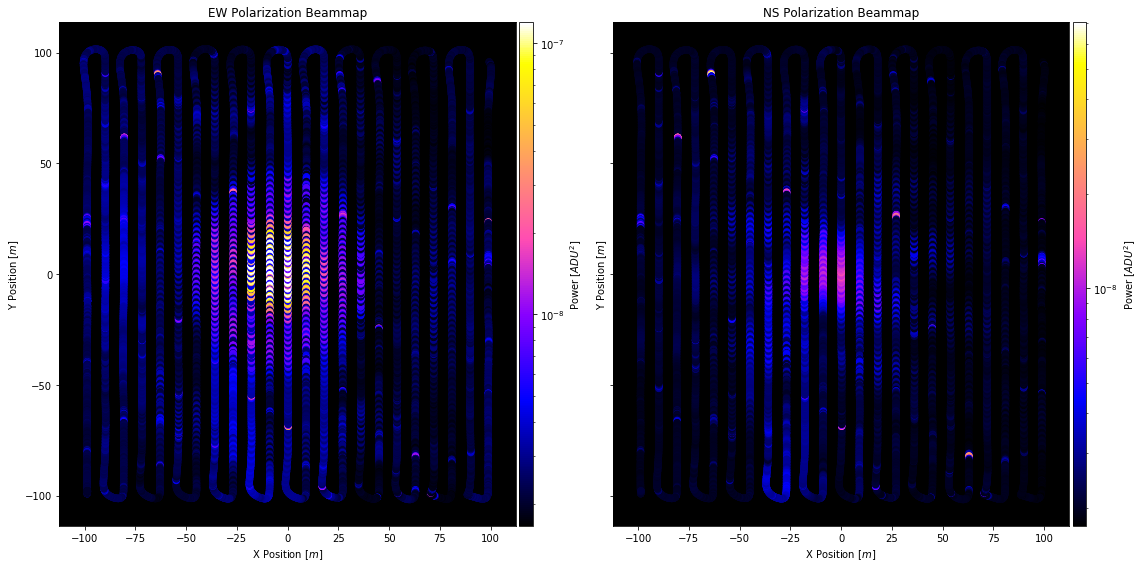

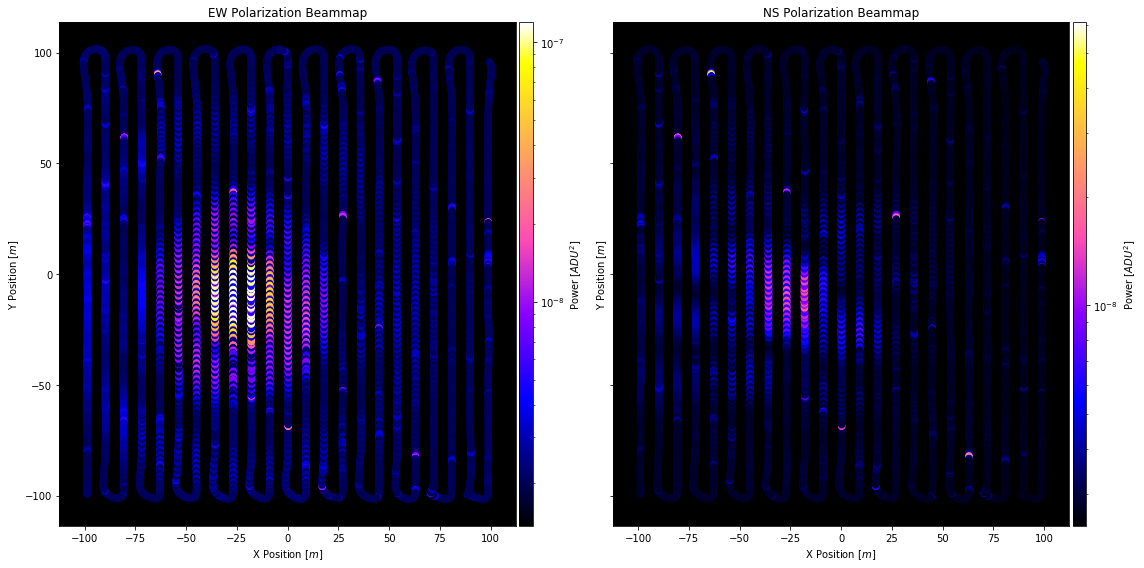

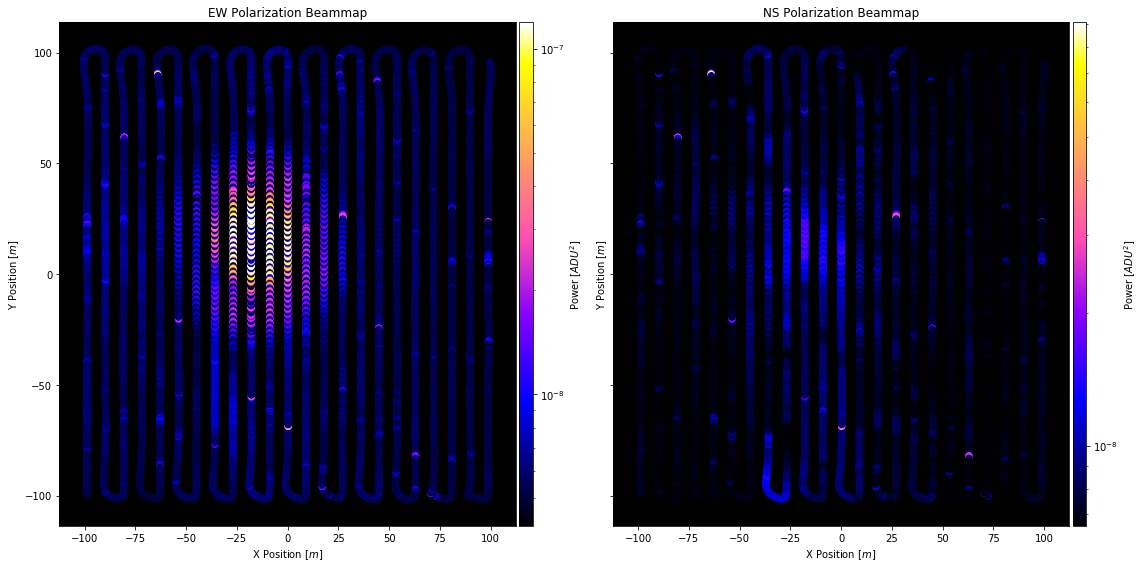

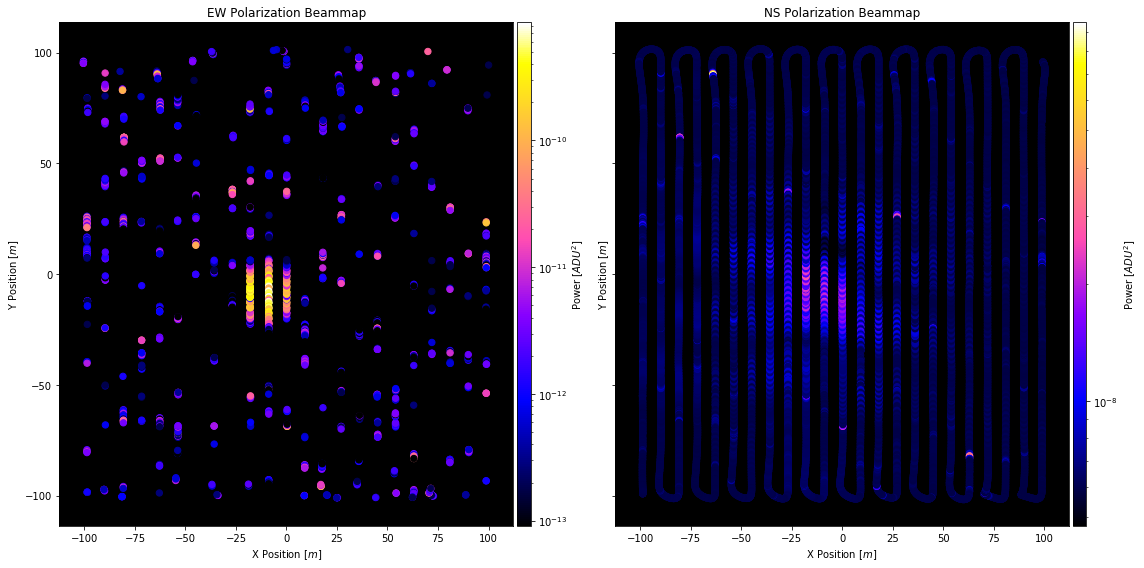

In [6]:
tlo,thi=[3750,24100]
flo,fhi=[900,910]
#flo,fhi=[80,100]
pulsedgridconcat.Plot_Beammap_LC(f_bounds=[flo,fhi],t_bounds=[tlo,thi],chanmap=[0,1],dotsize=40)
pulsedgridconcat.Plot_Beammap_LC(f_bounds=[flo,fhi],t_bounds=[tlo,thi],chanmap=[2,3])
pulsedgridconcat.Plot_Beammap_LC(f_bounds=[flo,fhi],t_bounds=[tlo,thi],chanmap=[4,5])
pulsedgridconcat.Plot_Beammap_LC(f_bounds=[flo,fhi],t_bounds=[tlo,thi],chanmap=[6,7])

In [ ]:
## Wednesday RFI Flight

## Read Drone Data: drone_directory=u'/Users/wct9/Desktop/GBO/'
ndishes=4
fly508drn=Drone_Data(dronedir=drone_directory,\
                FLYTAG='FLY508.csv',\
                Origin_llh=GBO_HIRAX_DISH_0,\
                Origin_key='Hirax_Dish_0',\
                dkeys=Array_Keys[:ndishes],\
                dcoords=Array_Coords[:ndishes],\
                dpointings=Array_Pointings[:ndishes],\
                dpols=Array_Pols[:ndishes])

## 4 DISH PLOTTING:
GBO_chmap=np.array([0,1,3,2,4,5,7,6])
GBO_automap=np.array([ 0,  8, 21, 15, 26, 30, 35, 33])
#GBO_automap=np.zeros(len(GBO_chmap)).astype(int)
#prodmat=np.array([element for tupl in test1.prod for element in tupl]).reshape(len(test1.prod),2)
#for i,j in enumerate(GBO_chmap):
#    GBO_automap[i]=np.intersect1d(np.where(prodmat[:,0]==j),np.where(prodmat[:,1]==j))
    
gaindir='/Users/wct9/Desktop/GBO/20210825T185917Z_yale_drone_yale_digitalgain/'
datadir='/Users/wct9/Desktop/GBO/20210825T185917Z_yale_drone/corr/20210825T185959Z/'
fly508corr=Corr_Data(Data_Directory=datadir,visindex=np.sort(GBO_automap),Gain_Directory=gaindir)

fly508concat=CONCAT(CORRDATCLASS=fly508corr,DRONEDATCLASS=fly508drn)

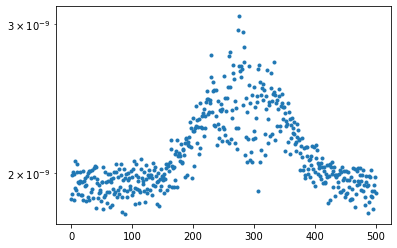

In [243]:
semilogy(fly508concat.V[8900:9400,900,2],'.')

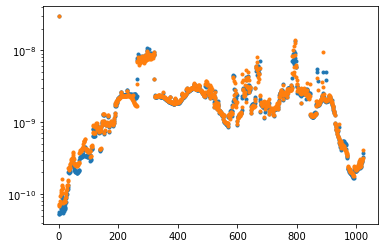

In [237]:
semilogy(np.nanmean(fly508concat.V[2500:5000,:,2],axis=0),'.')
semilogy(np.nanmean(fly508concat.V[9000:9100,:,2],axis=0),'.')
#semilogy(fly508concat.V[1000,:,0],'.')

In [272]:
fly508corr.freq[256]

700.0

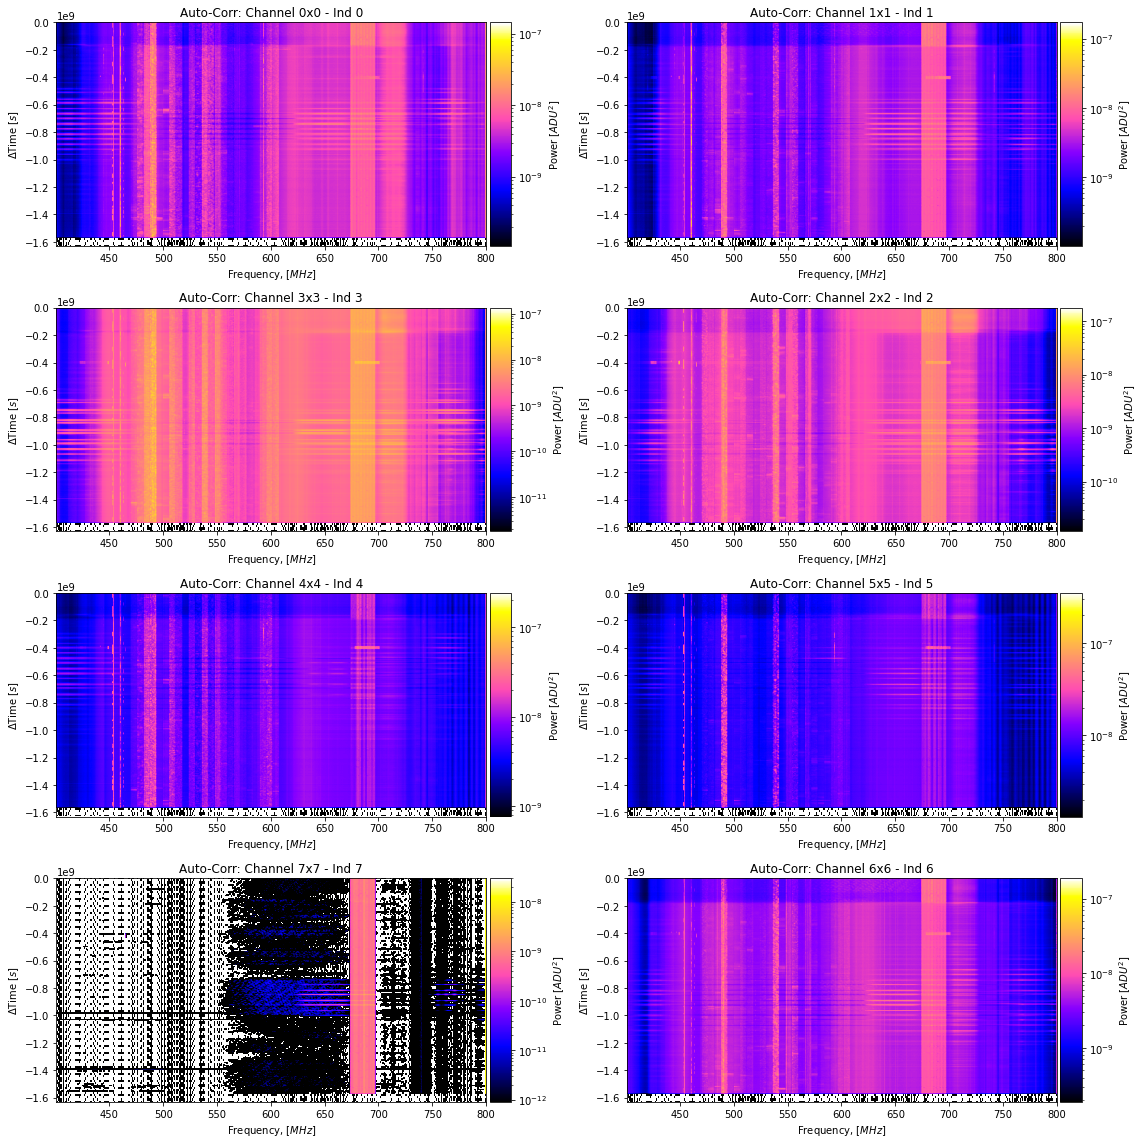

In [223]:
fly508corr.Plot_Auto_Corr_Waterfalls_4dish(chmap=GBO_chmap,prodmap=[0,1,3,2,4,5,7,6])

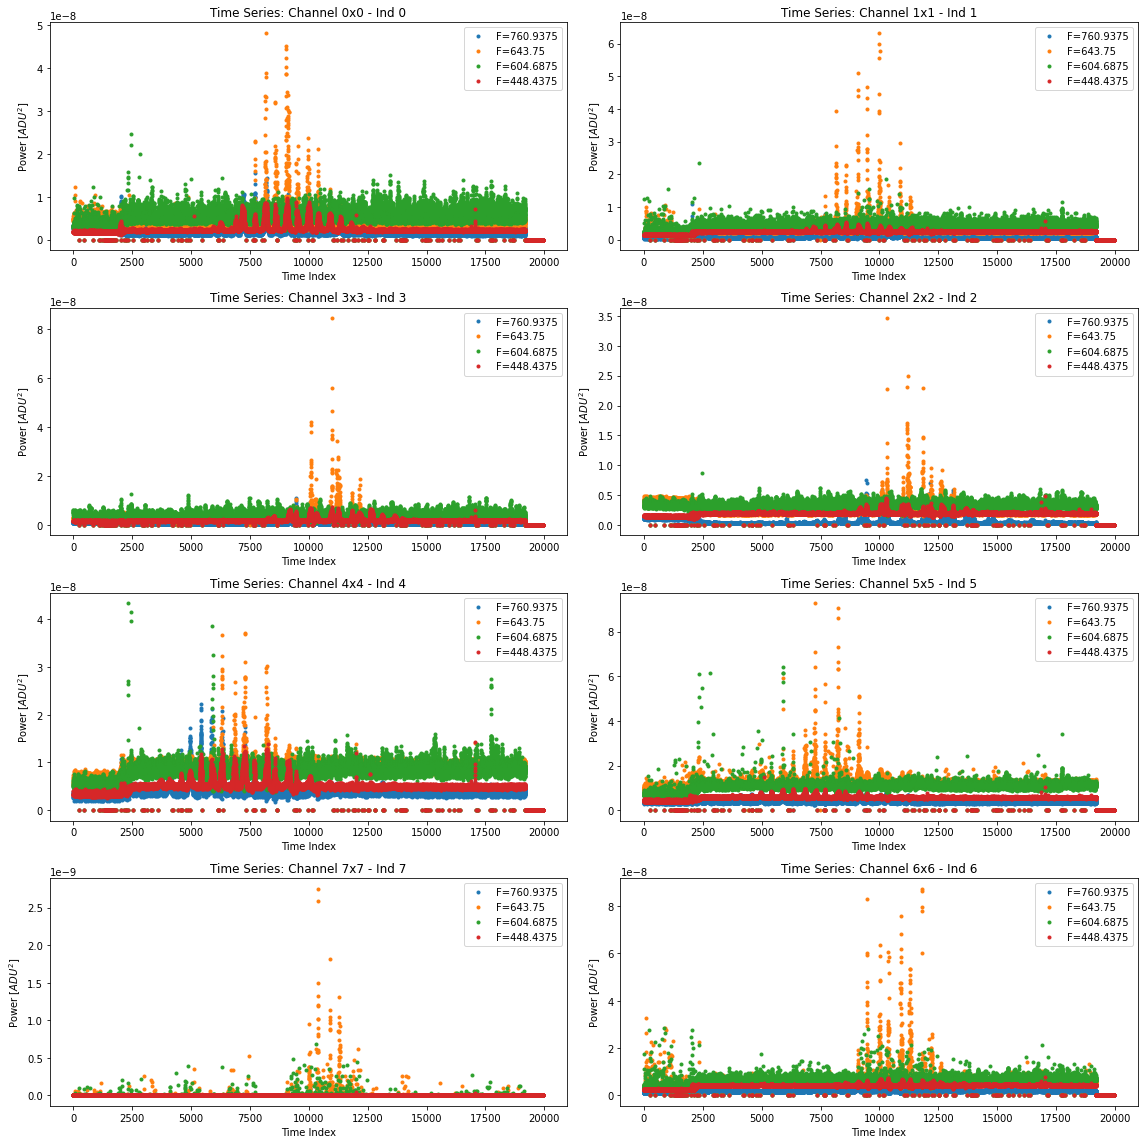

In [254]:
fly508corr.Plot_Auto_Corr_Time_Series_4dish(chmap=GBO_chmap,prodmap=[0,1,3,2,4,5,7,6])

In [255]:
10000/256

39.0625

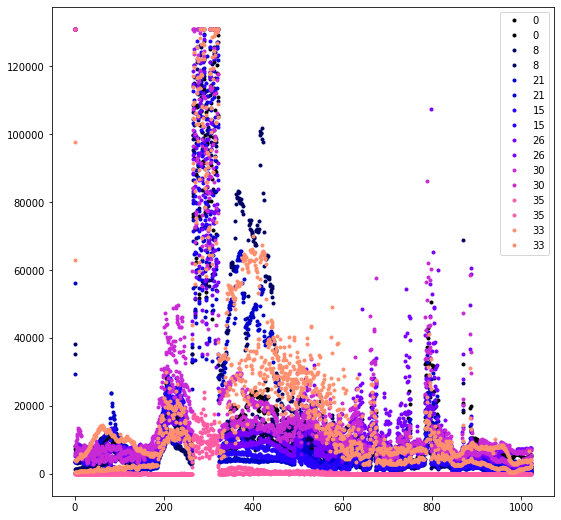

In [282]:
fd=h5py.File(fly508corr.Data_Directory+fly508corr.filenames[0], 'r')
fd1=h5py.File(fly508corr.Data_Directory+fly508corr.filenames[39], 'r')
vis=fd['vis'][:]
vis1=fd1['vis'][:]

fig1,ax1=subplots(nrows=1,ncols=1,figsize=(9,9))
for i,key in enumerate(GBO_automap):
    ax1.plot(np.nanmax(vis[:,:,key].real,axis=0),'.',c=colorsarr[i],label='{}'.format(key))
    ax1.plot(np.nanmax(vis1[:,:,key].real,axis=0),'.',c=colorsarr[i],label='{}'.format(key))
ax1.legend()

In [155]:
## First Wednesday Flight, looking at signal levels with dependence on yaw


## Read Drone Data: drone_directory=u'/Users/wct9/Desktop/GBO/'
ndishes=4
fly500drn=Drone_Data(dronedir=drone_directory,\
                FLYTAG='FLY500.csv',\
                Origin_llh=GBO_HIRAX_DISH_0,\
                Origin_key='Hirax_Dish_0',\
                dkeys=Array_Keys[:ndishes],\
                dcoords=Array_Coords[:ndishes],\
                dpointings=Array_Pointings[:ndishes],\
                dpols=Array_Pols[:ndishes])

## 4 DISH PLOTTING:
GBO_chmap=np.array([0,1,3,2,4,5,7,6])
GBO_automap=np.array([ 0,  8, 21, 15, 26, 30, 35, 33])
#GBO_automap=np.zeros(len(GBO_chmap)).astype(int)
#prodmat=np.array([element for tupl in test1.prod for element in tupl]).reshape(len(test1.prod),2)
#for i,j in enumerate(GBO_chmap):
#    GBO_automap[i]=np.intersect1d(np.where(prodmat[:,0]==j),np.where(prodmat[:,1]==j))
    
gaindir='/Users/wct9/Desktop/GBO/20210825T134238Z_yale_drone_yale_digitalgain/'
datadir='/Users/wct9/Desktop/GBO/20210825T134238Z_yale_drone/corr/20210825T134320Z/'
fly500corr=Corr_Data(Data_Directory=datadir,visindex=np.sort(GBO_automap),Gain_Directory=gaindir)

fly500concat=CONCAT(CORRDATCLASS=fly500corr,DRONEDATCLASS=fly500drn)

/Users/wct9/Library/Python/3.7/lib/python/site-packages/IPython/core/interactiveshell.py:3254: DtypeWarning: Columns (117,118,119,120,121,122,123,124,125,126) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


Initializing drone data via datcon_csv routine: FLY500.csv
Interpolating time starting at 2021-08-25T13:50:04Z
generating llh, geocentric cartesian, local cartesian, and local spherical coordinates.
generating dish and receiver line of sight coordinates.
Initializing CONCAT CLASS using /Users/wct9/Desktop/GBO/20210825T134238Z_yale_drone/corr/20210825T134320Z/ and FLY500.csv
2021-08-25 14:09:50.462000+00:00 2021-08-25 13:50:04.900000+00:00
7841 27904
(20063,)


/Users/wct9/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:25: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future


20063 11821


/Users/wct9/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:26: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future


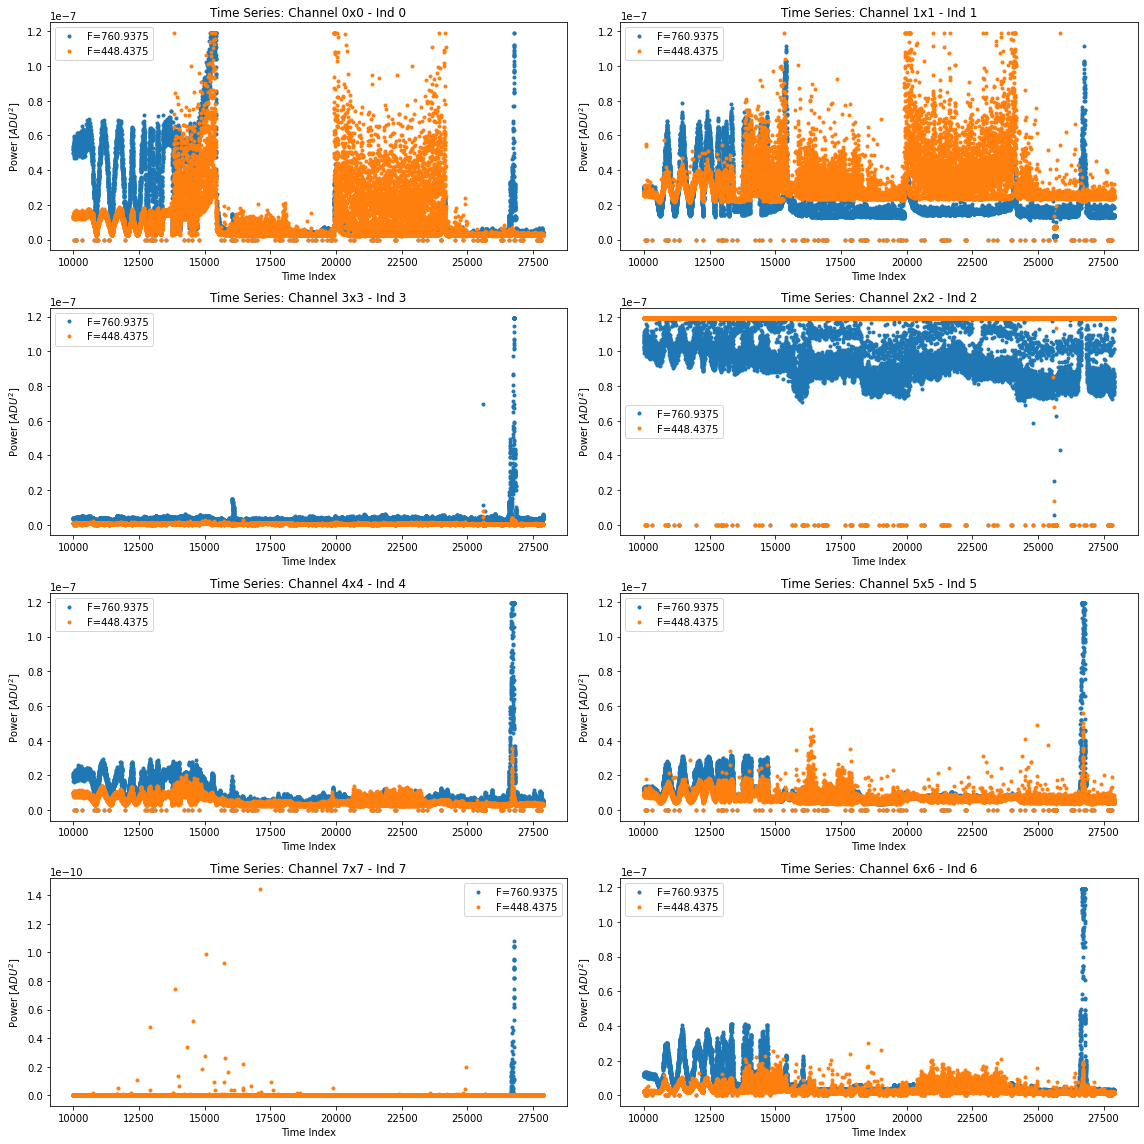

In [186]:
fly500corr.Plot_Auto_Corr_Time_Series_4dish(chmap=GBO_chmap,prodmap=[0,1,3,2,4,5,7,6],tbounds=[10000,-1],freqlist=[100,900])

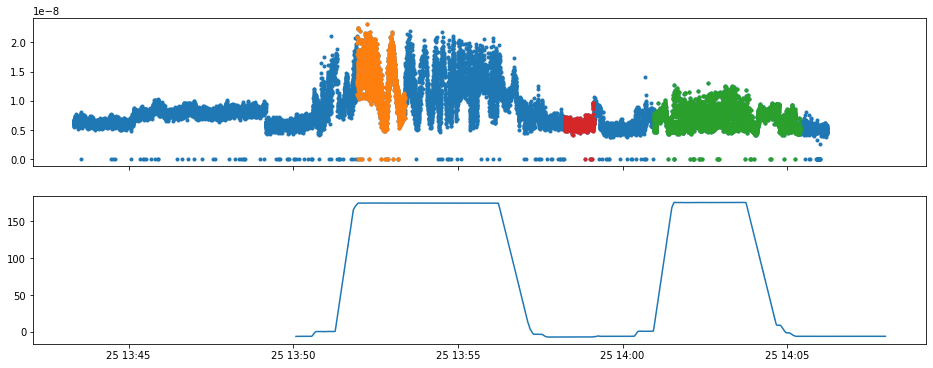

In [193]:
fig1,[ax1,ax2]=subplots(nrows=2,ncols=1,figsize=(16,6),sharex=True)

#plot(fly500concat.t_arr_datetime,fly500concat.V[:,900,0],'.')
#plot(fly500concat.t_arr_datetime[slb:sub],fly500concat.V[slb:sub,900,0],'.')
#plot(fly500concat.drone_yaw_interp[slb:sub])
ax1.plot(fly500concat.t_arr_datetime[:26000],fly500concat.V[:26000,820,4],'.',label=str(key))
ax1.plot(fly500concat.t_arr_datetime[slb:sub],fly500concat.V[slb:sub,820,4],'.',label=str(key))
ax1.plot(fly500concat.t_arr_datetime[20000:25000],fly500concat.V[20000:25000,820,4],'.',label=str(key))
ax1.plot(fly500concat.t_arr_datetime[17000:18000],fly500concat.V[17000:18000,820,4],'.',label=str(key))

ax2.plot(fly500concat.t_arr_datetime[:],fly500concat.drone_xyz_LC_interp[:,2])


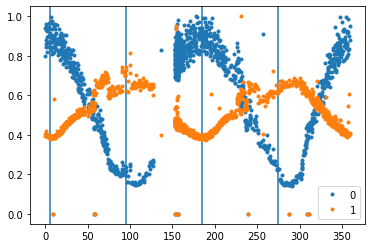

In [174]:
slb,sub=[10000,11500]
axvline(5)
axvline(95)
axvline(185)
axvline(275)
for key in [0,1]:
    plot(fly500concat.drone_yaw_interp[slb:sub],fly500concat.V[slb:sub,900,key]/np.nanmax(fly500concat.V[slb:sub,900,key]),'.',label=str(key))
legend()

In [95]:
Test_Grid_Concat=CONCAT(CORRDATCLASS=test1,DRONEDATCLASS=dronedattest)

Initializing CONCAT CLASS using /Users/wct9/Desktop/GBO/20210824T205320Z_yale_drone/corr/20210824T205331Z/ and FLY497.csv
2021-08-24 21:14:44.825000+00:00 2021-08-24 20:54:12.999000+00:00
866 22784
(21918,)


/Users/wct9/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:25: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
/Users/wct9/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:26: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future


21918 12022


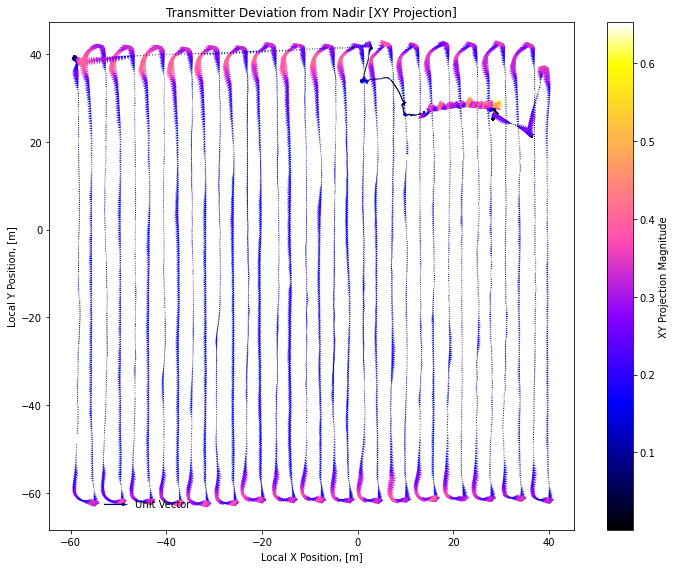

In [96]:
dronedattest.Plot_Transmitter_Pointing()

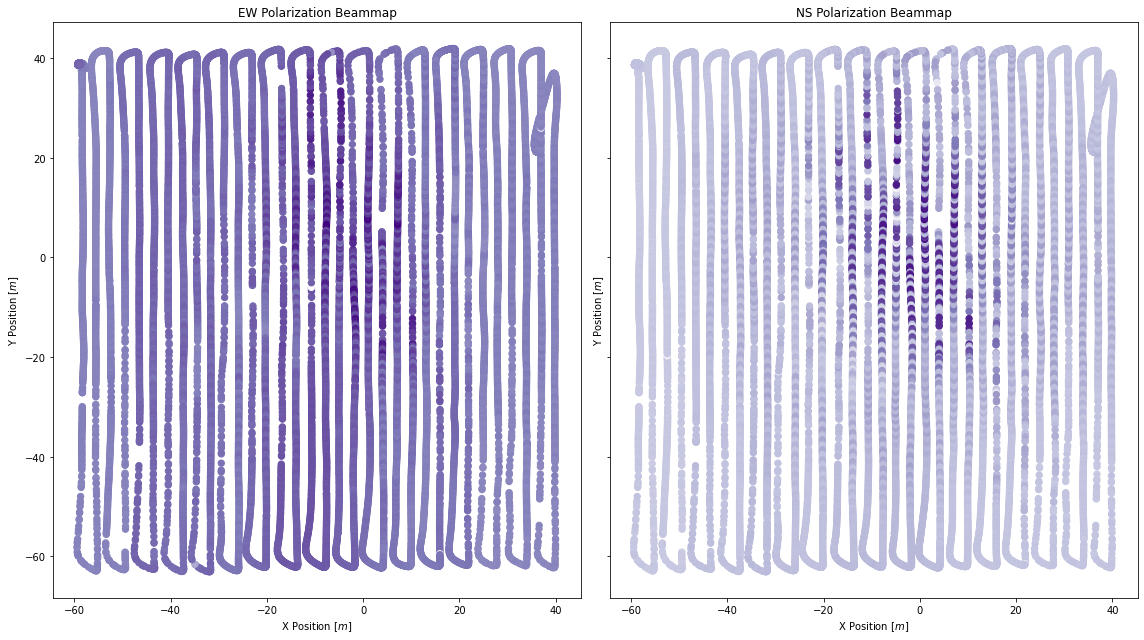

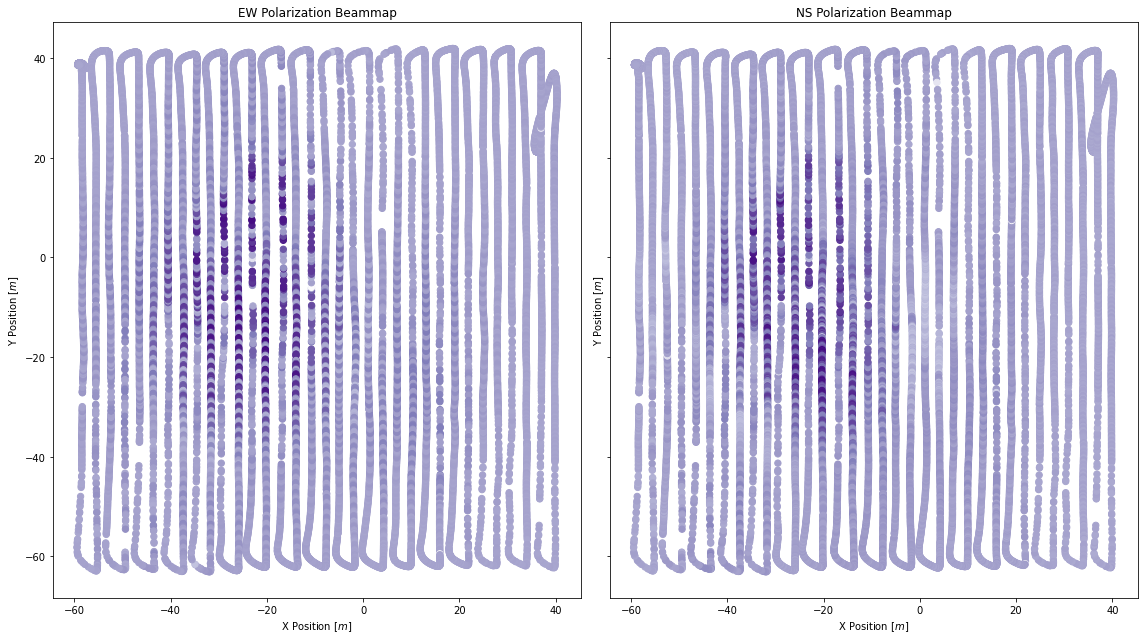

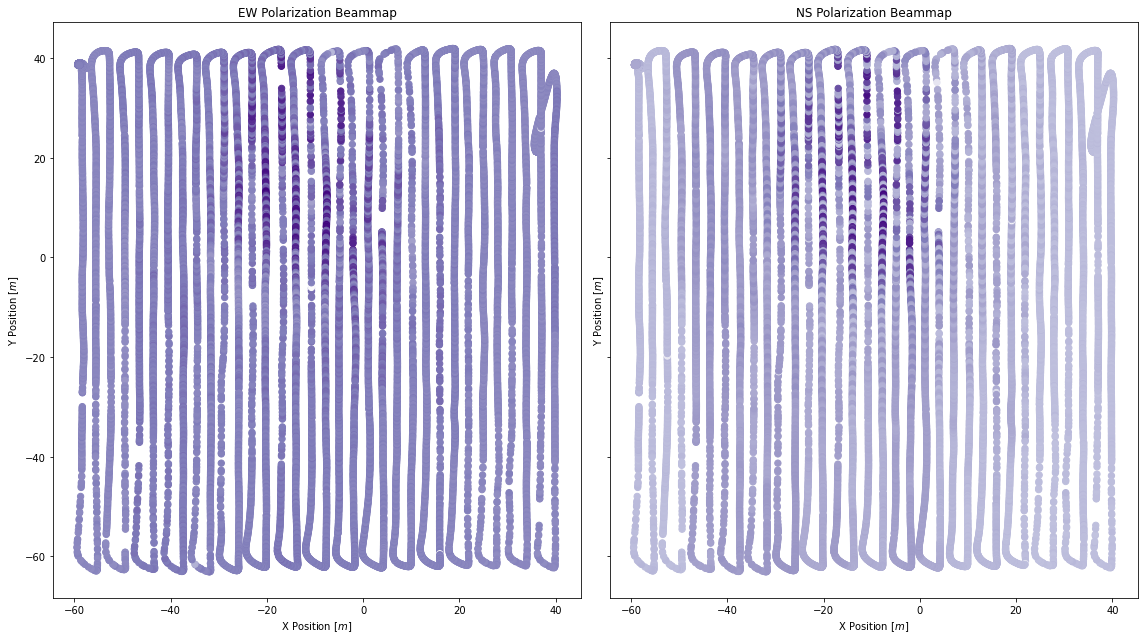

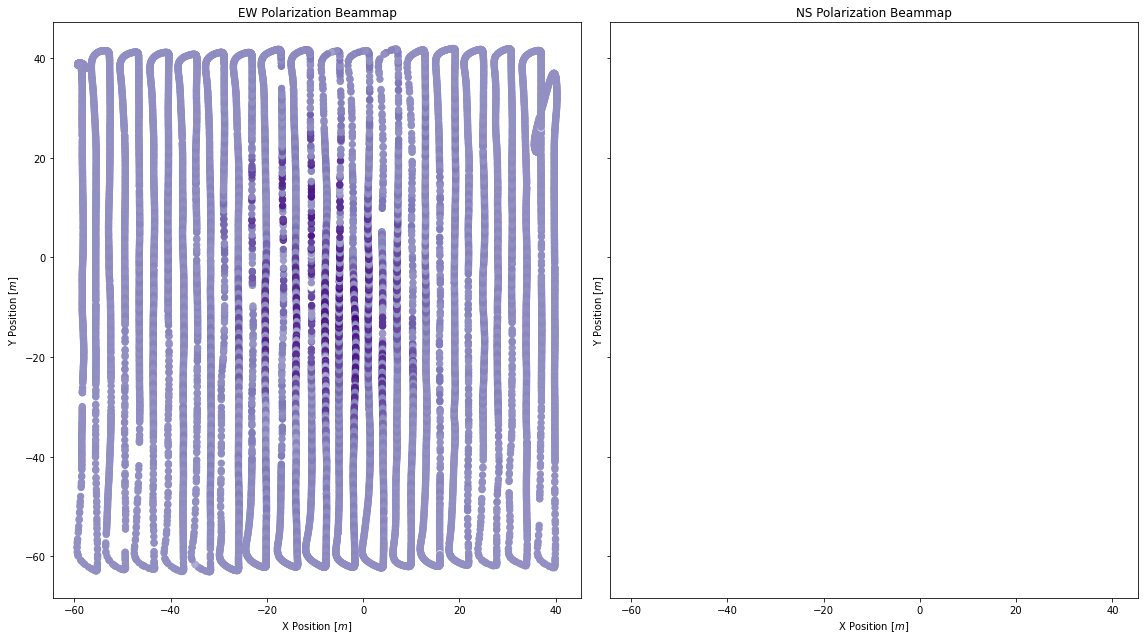

In [138]:
flo,fhi=[900,910]
Test_Grid_Concat.Plot_Beammap_LC(f_bounds=[flo,fhi],t_bounds=[4000,20000],chanmap=[0,1])
Test_Grid_Concat.Plot_Beammap_LC(f_bounds=[flo,fhi],t_bounds=[4000,20000],chanmap=[2,3])
Test_Grid_Concat.Plot_Beammap_LC(f_bounds=[flo,fhi],t_bounds=[4000,20000],chanmap=[4,5])
Test_Grid_Concat.Plot_Beammap_LC(f_bounds=[flo,fhi],t_bounds=[4000,20000],chanmap=[6,7])

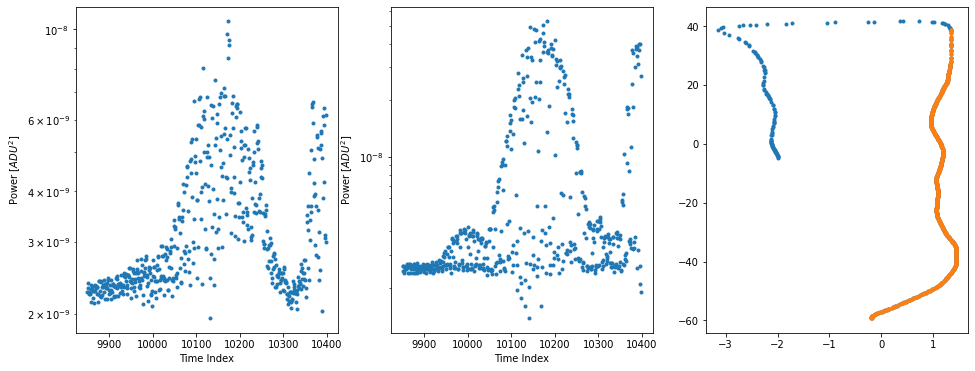

In [98]:
interplb,interpub=[4000,20000] # Full Grid
#interplb,interpub=[7340,20570] # Full Grid
#interplb,interpub=[7340,13930] # East-West Grid Time Indices
#interplb,interpub=[13930,20570] # North-South Grid Time Indices
interplb,interpub=[9850,10400] # Full Grid
fig2,[ax1,ax2,ax3]=subplots(nrows=1,ncols=3,figsize=(16,6))
for i,ax in enumerate([ax1,ax2]):
    #ax.semilogy(Test_Grid_Concat.t_index[interplb:interpub],Test_Grid_Concat.V[interplb:interpub,250,i],'.')
    ax.semilogy(Test_Grid_Concat.t_index[interplb:interpub],Test_Grid_Concat.V[interplb:interpub,900,i],'.')
    ax.set_xlabel('Time Index')
    ax.set_ylabel('Power $[ADU^2]$')
ax3.plot(Test_Grid_Concat.drone_xyz_LC_interp[interplb:interpub,0],Test_Grid_Concat.drone_xyz_LC_interp[interplb:interpub,1],'.')
interplb,interpub=[9850,10280] # Full Grid
ax3.plot(Test_Grid_Concat.drone_xyz_LC_interp[interplb:interpub,0],Test_Grid_Concat.drone_xyz_LC_interp[interplb:interpub,1],'.')


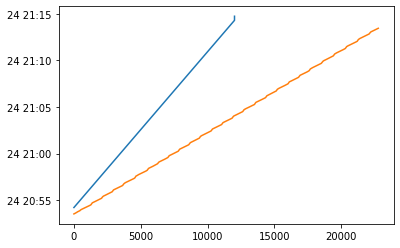

In [32]:
plot(dronedattest.t_arr_datetime)
plot(test1.t_arr_datetime)

(-20.0, 20.0)

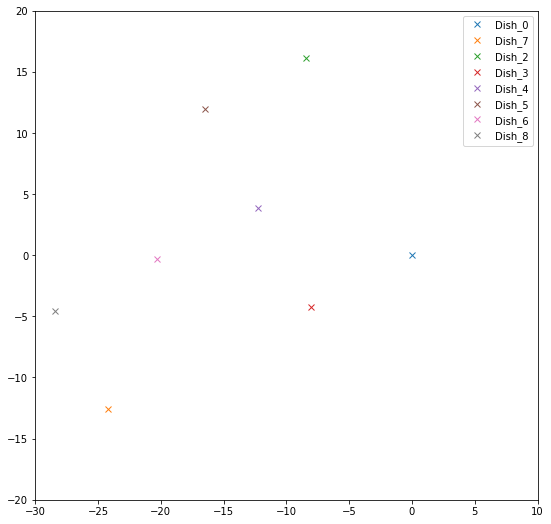

In [20]:
fig,ax1=subplots(nrows=1,ncols=1,figsize=(9,9))

for i,key in enumerate(Array_Keys):
    plot(Array_Coords[i,0],Array_Coords[i,1],'x',label=key)
legend()

ax1.set_xlim(-30,10)
ax1.set_ylim(-20,20)

In [88]:
## 4 DISH PLOTTING:
GBO_chmap=np.array([0,1,3,2,4,5,7,6])
GBO_automap=np.array([ 0,  8, 21, 15, 26, 30, 35, 33])
skip
GBO_automap=np.zeros(len(GBO_chmap)).astype(int)
prodmat=np.array([element for tupl in test1.prod for element in tupl]).reshape(len(test1.prod),2)
for i,j in enumerate(GBO_chmap):
    GBO_automap[i]=np.intersect1d(np.where(prodmat[:,0]==j),np.where(prodmat[:,1]==j))

NameError: name 'skip' is not defined

In [ ]:
gaindir='/Users/wct9/Desktop/GBO/20210824T205320Z_yale_drone_yale_digitalgain/'
datadir='/Users/wct9/Desktop/GBO/20210824T205320Z_yale_drone/corr/20210824T205331Z/'

test1=Corr_Data(Data_Directory=datadir,visindex=np.sort(GBO_automap),Gain_Directory=gaindir)

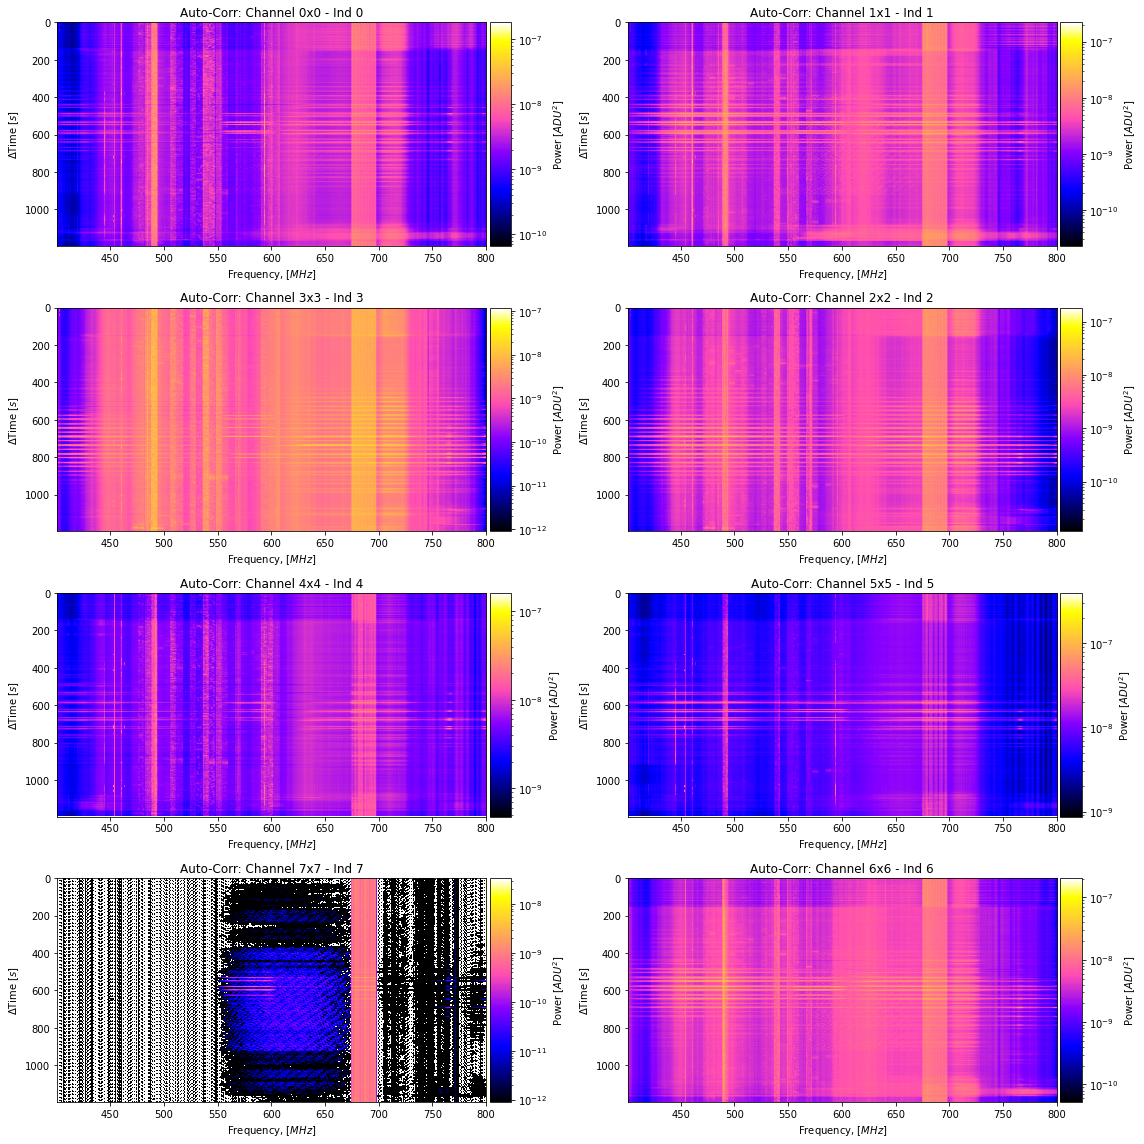

In [9]:
test1.Plot_Auto_Corr_Waterfalls_4dish(chmap=GBO_chmap,prodmap=[0,1,3,2,4,5,7,6])

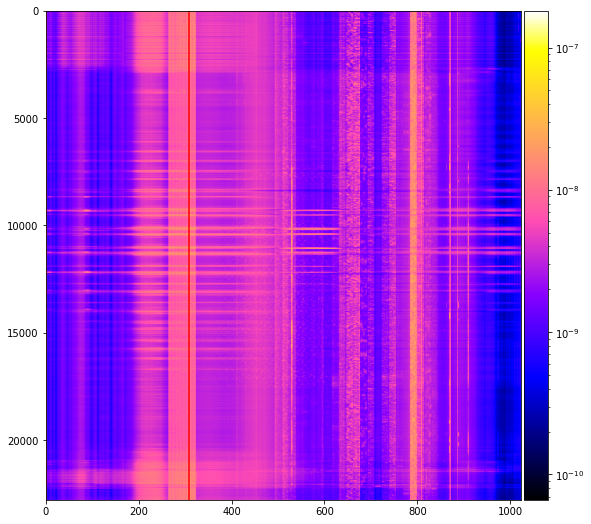

In [265]:
fig1,ax1=subplots(nrows=1,ncols=1,figsize=(9,9))
im=ax1.imshow(test1.V_full[:,:,0],aspect="auto",cmap='gnuplot2',norm=LogNorm())
divider=make_axes_locatable(ax1)
cax=divider.append_axes("right", size="5%", pad=0.05)
cbar=fig1.colorbar(im,cax=cax)
ax1.axvline(308,c='r')

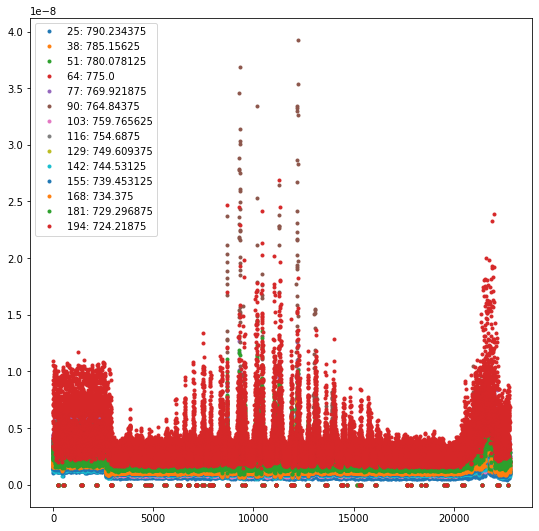

In [266]:
fig1,ax1=subplots(nrows=1,ncols=1,figsize=(9,9))
for i in np.arange(25,200,13):
    ax1.plot(test1.V_full[:,i,0],'.',label="{}: {}".format(i,test1.freq[i]))
ax1.legend()

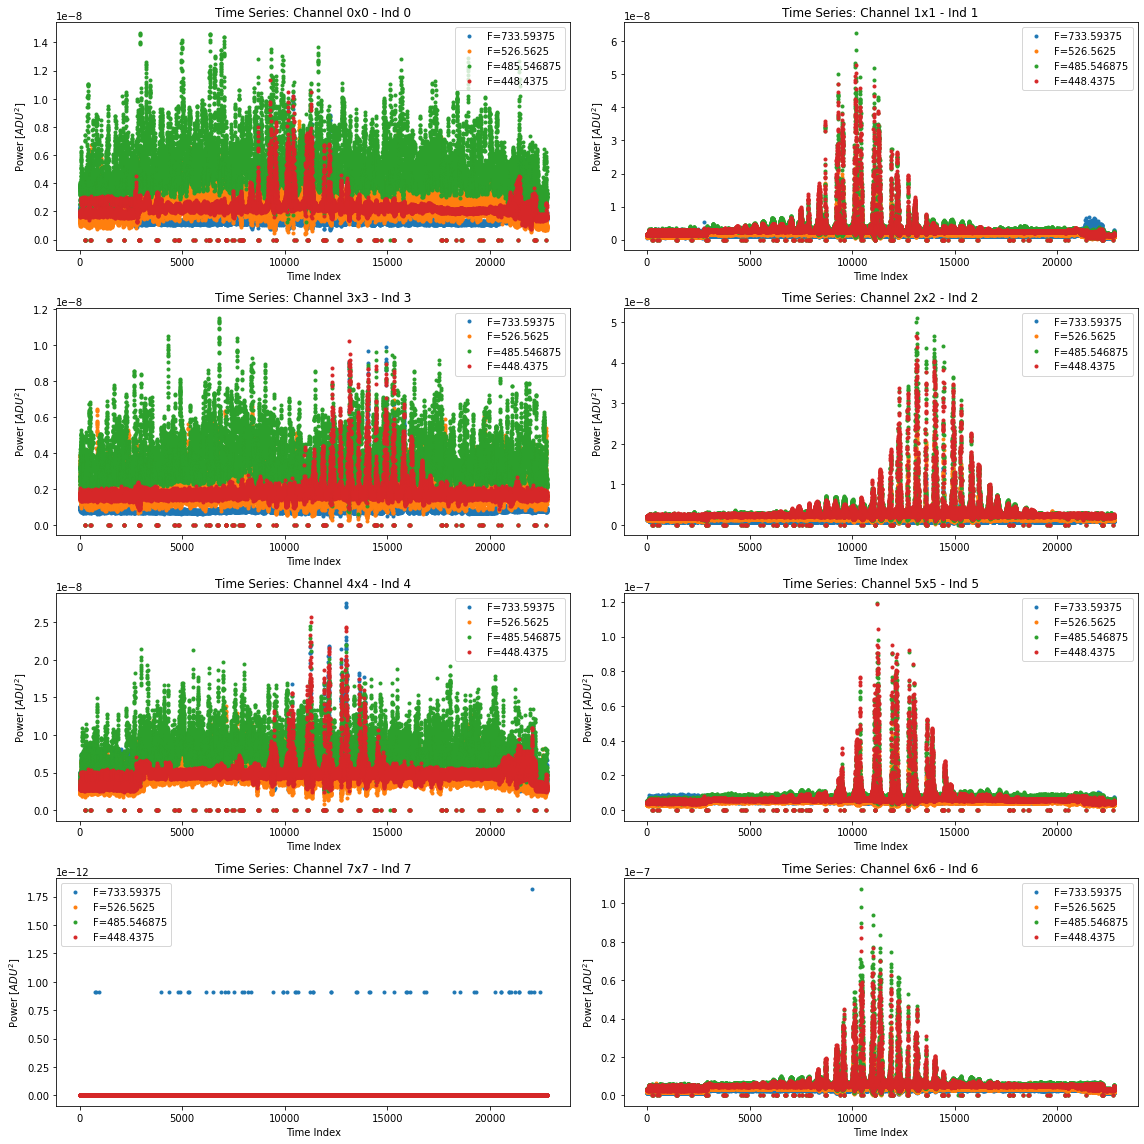

In [134]:
test1.Plot_Auto_Corr_Time_Series_4dish(chmap=GBO_chmap,prodmap=[0,1,3,2,4,5,7,6],tbounds=[0,-1],freqlist=[170,700,805,900])

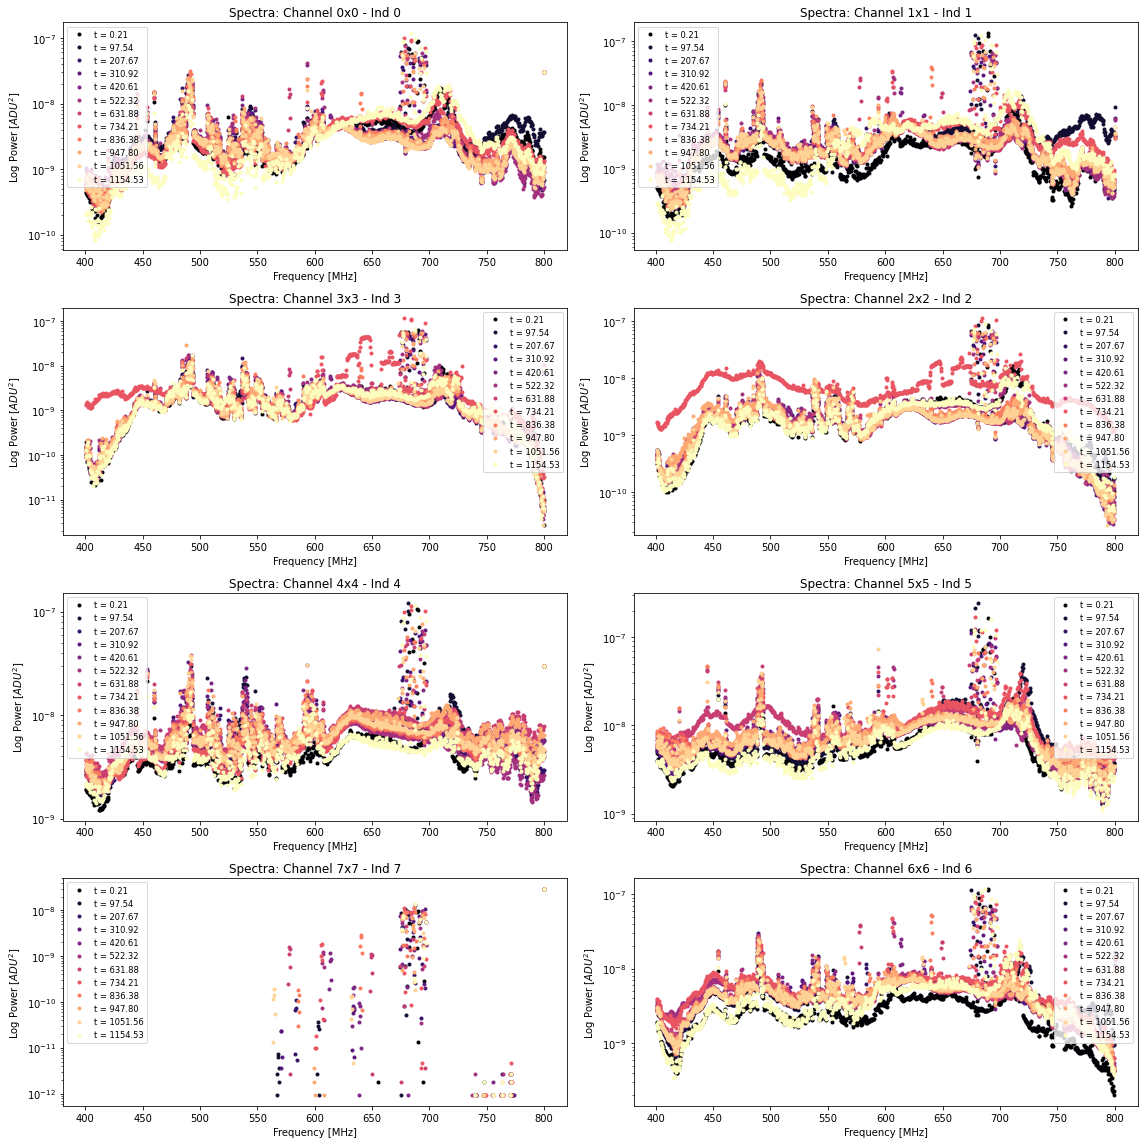

In [230]:
test1.Plot_Auto_Corr_Spectra_4dish(chmap=GBO_chmap,prodmap=[0,1,3,2,4,5,7,6],tbounds=[5,-5],tstep=2000)

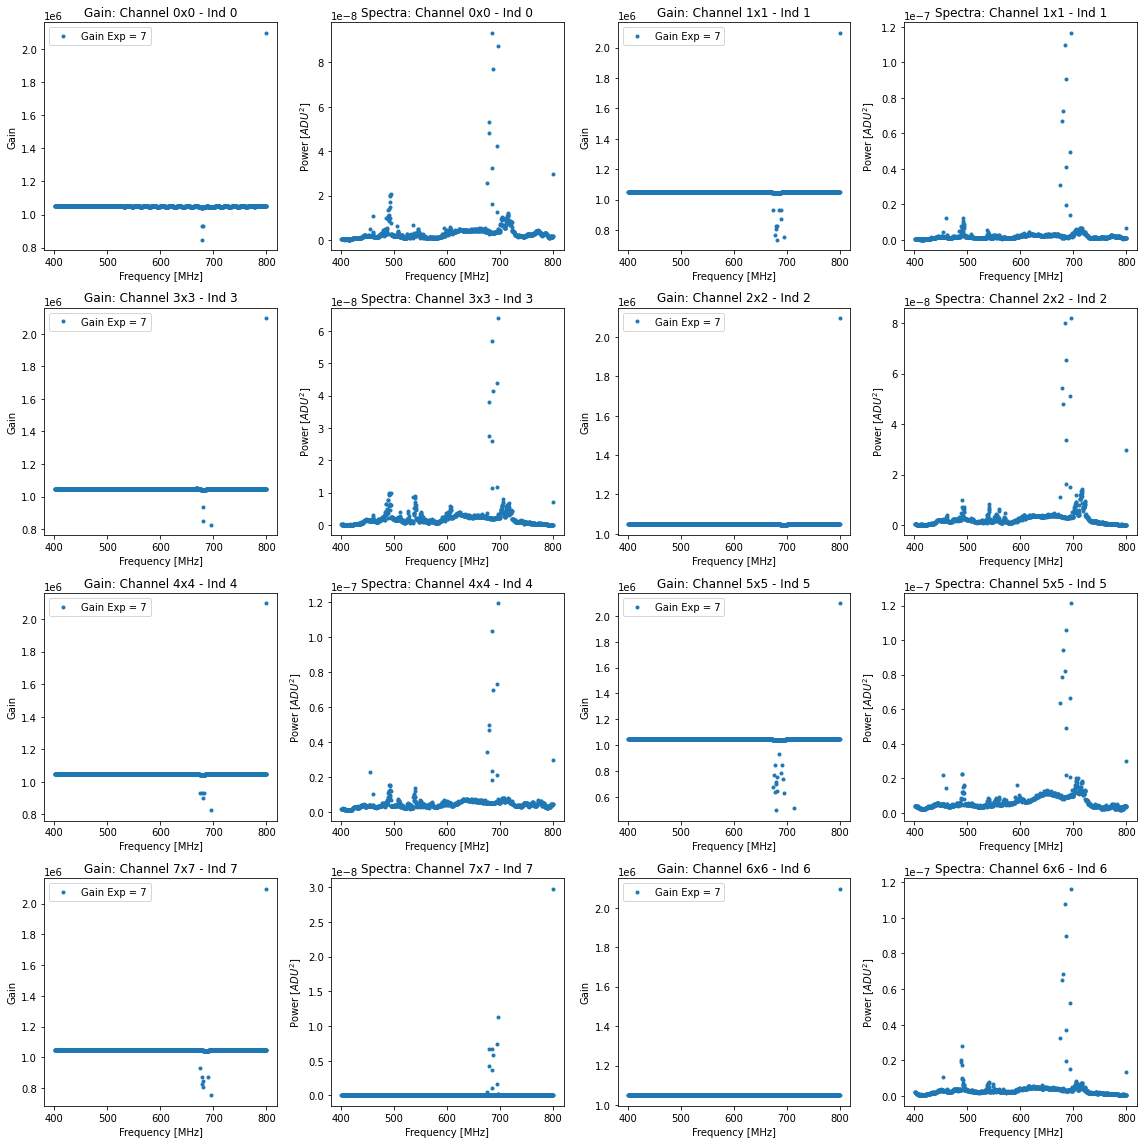

In [231]:
test1.Plot_Gains_vs_Data_4dish(chmap=GBO_chmap,prodmap=[0,1,3,2,4,5,7,6])

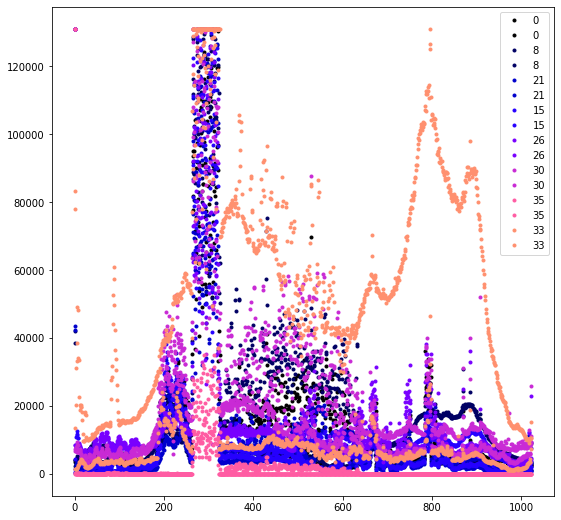

In [131]:
fd=h5py.File(test1.Data_Directory+test1.filenames[0], 'r')
fd1=h5py.File(test1.Data_Directory+test1.filenames[42], 'r')
vis=fd['vis'][:]
vis1=fd1['vis'][:]

fig1,ax1=subplots(nrows=1,ncols=1,figsize=(9,9))
for i,key in enumerate(GBO_automap):
    ax1.plot(np.nanmax(vis[:,:,key].real,axis=0),'.',c=colorsarr[i],label='{}'.format(key))
    ax1.plot(np.nanmax(vis1[:,:,key].real,axis=0),'.',c=colorsarr[i],label='{}'.format(key))
ax1.legend()

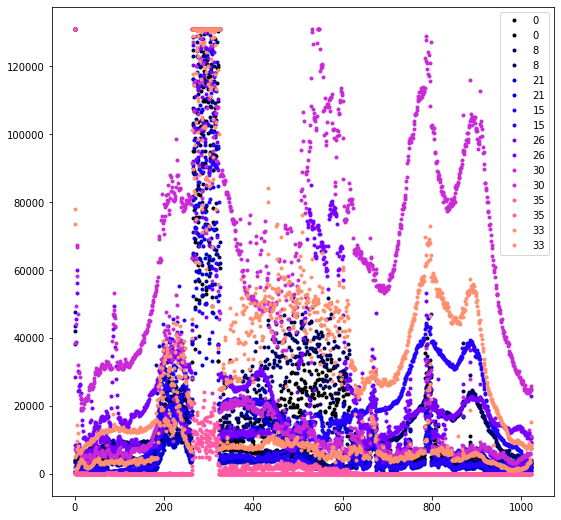

In [132]:
fd=h5py.File(test1.Data_Directory+test1.filenames[0], 'r')
fd1=h5py.File(test1.Data_Directory+test1.filenames[49], 'r')
vis=fd['vis'][:]
vis1=fd1['vis'][:]

fig1,ax1=subplots(nrows=1,ncols=1,figsize=(9,9))
for i,key in enumerate(GBO_automap):
    ax1.plot(np.nanmax(vis[:,:,key].real,axis=0),'.',c=colorsarr[i],label='{}'.format(key))
    ax1.plot(np.nanmax(vis1[:,:,key].real,axis=0),'.',c=colorsarr[i],label='{}'.format(key))
ax1.legend()

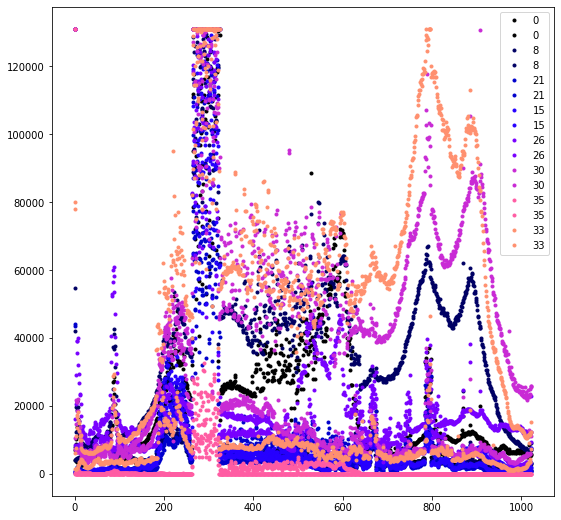

In [133]:
fd=h5py.File(test1.Data_Directory+test1.filenames[0], 'r')
fd1=h5py.File(test1.Data_Directory+test1.filenames[40], 'r')
vis=fd['vis'][:]
vis1=fd1['vis'][:]

fig1,ax1=subplots(nrows=1,ncols=1,figsize=(9,9))
for i,key in enumerate(GBO_automap):
    ax1.plot(np.nanmax(vis[:,:,key].real,axis=0),'.',c=colorsarr[i],label='{}'.format(key))
    ax1.plot(np.nanmax(vis1[:,:,key].real,axis=0),'.',c=colorsarr[i],label='{}'.format(key))
ax1.legend()

In [47]:
drone_directory=u'/Users/wct9/Desktop/GBO/'
ndishes=4
spintest=Drone_Data(dronedir=drone_directory,\
                FLYTAG='FLY496.csv',\
                Origin_llh=GBO_HIRAX_DISH_0,\
                Origin_key='Hirax_Dish_0',\
                dkeys=Array_Keys[:ndishes],\
                dcoords=Array_Coords[:ndishes],\
                dpointings=Array_Pointings[:ndishes],\
                dpols=Array_Pols[:ndishes])

Initializing drone data via datcon_csv routine: FLY496.csv
Interpolating time starting at 2021-08-24T20:29:34Z
generating llh, geocentric cartesian, local cartesian, and local spherical coordinates.
generating dish and receiver line of sight coordinates.


In [54]:
gaindir='/Users/wct9/Desktop/GBO/20210824T201532Z_yale_drone_yale_digitalgain/'
datadir='/Users/wct9/Desktop/GBO/20210824T201532Z_yale_drone/corr/20210824T201543Z/'
## 2 DISH PLOTTING:
GBO_chmap=np.array([0,1])
GBO_automap=np.zeros(len(GBO_chmap)).astype(int)
prodmat=np.array([element for tupl in test1.prod for element in tupl]).reshape(len(test1.prod),2)
for i,j in enumerate(GBO_chmap):
    GBO_automap[i]=np.intersect1d(np.where(prodmat[:,0]==j),np.where(prodmat[:,1]==j))
spindat=Corr_Data(Data_Directory=datadir,Gain_Directory=gaindir)

Initializing CONCAT CLASS using /Users/wct9/Desktop/GBO/20210824T201532Z_yale_drone/corr/20210824T201543Z/ and FLY496.csv
2021-08-24 20:41:59.680000+00:00 2021-08-24 20:29:34.198000+00:00
19803 36864
(17061,)


/Users/wct9/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:25: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future
/Users/wct9/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:26: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future


17061 2955


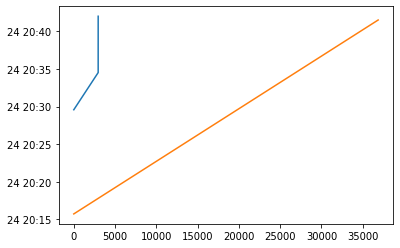

In [61]:
plot(spintest.t_arr_datetime)
plot(spindat.t_arr_datetime)
spin_Concat=CONCAT(CORRDATCLASS=spindat,DRONEDATCLASS=spintest)

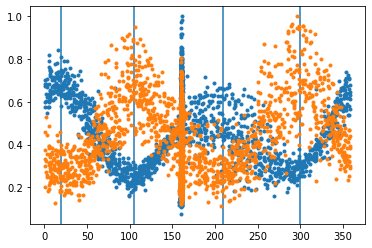

In [78]:
slb,sub=[23000,26000]
axvline(20)
axvline(105)
axvline(210)
axvline(300)
plot(spin_Concat.drone_yaw_interp[slb:sub],spin_Concat.V[slb:sub,900,0]/np.nanmax(spin_Concat.V[slb:sub,900,0]),'.')
plot(spin_Concat.drone_yaw_interp[slb:sub],spin_Concat.V[slb:sub,900,2]/np.nanmax(spin_Concat.V[slb:sub,900,2]),'.')